<div align="center">

## Classification Project for Diabetes Prediction
### Autor : Vinh Tang

</div>

### Libraries import

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from lazypredict.Supervised import LazyClassifier
import pickle
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

### ML Pipeline

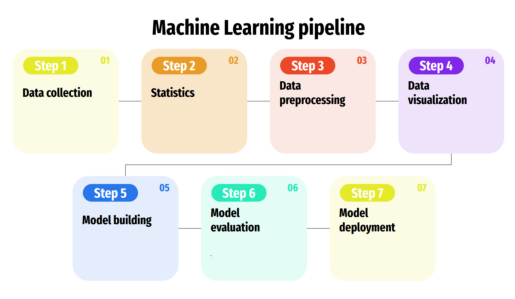

In [21]:
def show_image(filename):
    img = mpimg.imread(filename)
    plt.imshow(img)
    plt.axis('off') 
    plt.show()

show_image("ML_Pipeline.png")

### Step 1 : Data collection : skip because data is already available
### Step between step 1 and step 2: Importing data

In [22]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


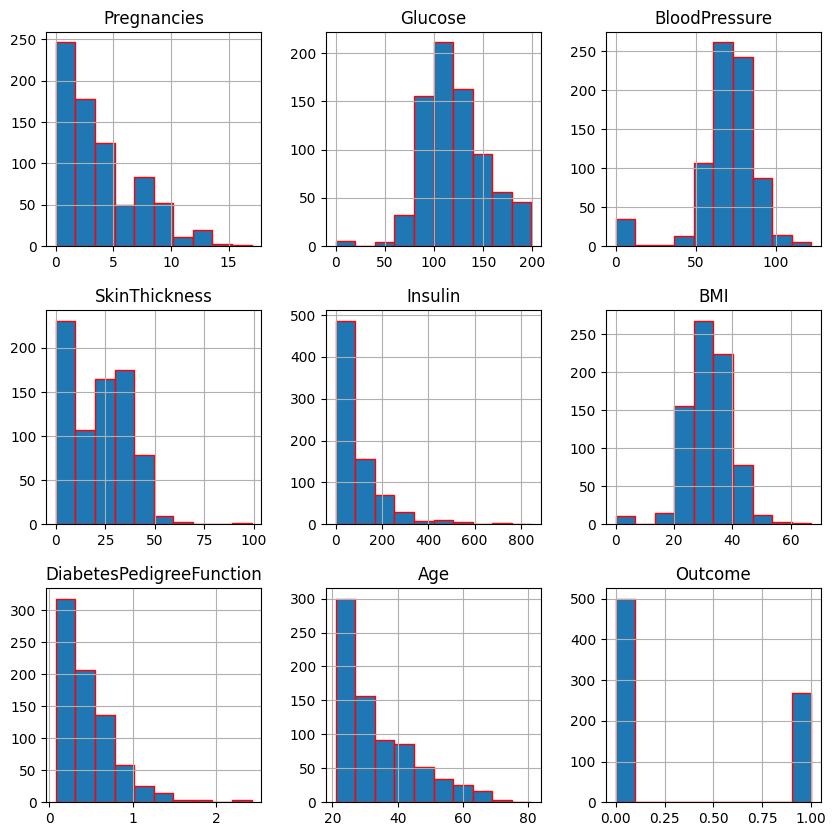

In [25]:
# Visualisation:

df.hist(figsize=(10,10), bins=10,edgecolor="red")

plt.show()

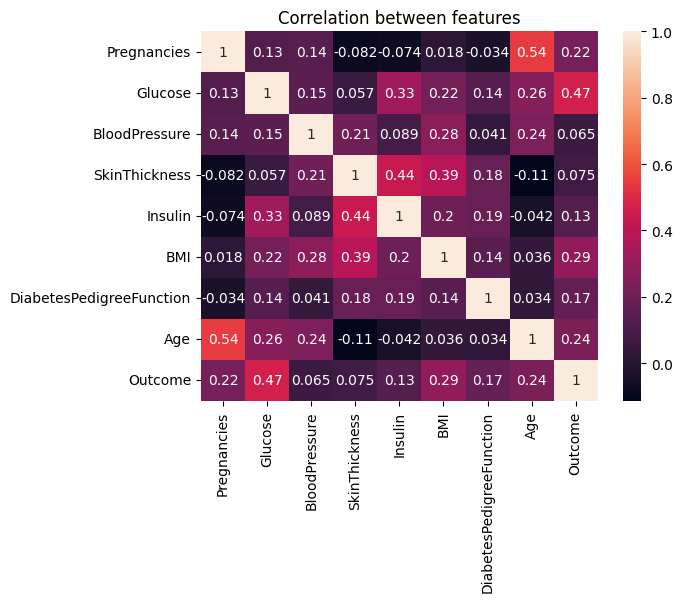

In [26]:
sns.heatmap(df.corr(), annot=True) # annot is used for displaying numbers
plt.title("Correlation between features")
plt.show()

### There is a way to combine step 2 and step 4 into one command using the "ydata-profiling" library to get a complete report on step 2 and step 4

In [27]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Classification - Diabetes Report")
# profile.to_file("Classification_Report.html")

# After using it, comment it out so it runs only once, that's enough because it only shows us the unprocessed data at first.

### Step before data preprocessing step (step 3): data division step

A. Identify features and target

In [28]:
target = "Outcome" # identify target

x = df.drop(target, axis=1) # Split the X columns (feature columns)
y = df[target] # Split the Y column (target)
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

B. Identify train set, validation test and test set

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
# x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.25, random_state=42) # in this cas, there is no need to split the validation set
x_train


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.00,0.30,21
618,9,112,82,24,0,28.20,1.28,50
346,1,139,46,19,83,28.70,0.65,22
294,0,161,50,0,0,21.90,0.25,65
231,6,134,80,37,370,46.20,0.24,46
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.60,0.41,26
106,1,96,122,0,0,22.40,0.21,27
270,10,101,86,37,0,45.60,1.14,38
435,0,141,0,0,0,42.40,0.20,29


### Step 3 : Data pre-processing
#### Step 3.1 : Preprocessing NUMERICAL FEATURE

In [30]:
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(x_train)
result = scaler.transform(x_train) 
# or fit_transform(x_train)
result


array([[0.11764706, 0.42211055, 0.        , ..., 0.        , 0.09649872,
        0.        ],
       [0.52941176, 0.56281407, 0.67213115, ..., 0.42026826, 0.51409052,
        0.48333333],
       [0.05882353, 0.69849246, 0.37704918, ..., 0.42771982, 0.24594364,
        0.01666667],
       ...,
       [0.58823529, 0.50753769, 0.70491803, ..., 0.67958271, 0.45175064,
        0.28333333],
       [0.        , 0.70854271, 0.        , ..., 0.6318927 , 0.05422716,
        0.13333333],
       [0.        , 0.6281407 , 0.78688525, ..., 0.33532042, 0.07856533,
        0.        ]])

### Step 5: Model choosing

In the classification problem, we have several models to use such as logistic regression, K-nearest-neighbours, Decision Tree, Random Forest, Support Vector Machine...
So to choose a model, we go back to the report file to see the correlations section

![Biểu đồ](Report_correlation.png "correlation chart")

We see that here there is no feature with strong correlation (<0.7) compared to the target (Outcome column), which means this is not a linear model

Therefore, we should not (just should not, but in reality there are still users) use linear models (here is logistic regression) because linear models are only for datasets in which the correlation between feature and outcome is strong

=> Choose nonlinear models (here is K-nearest-neighbours, Decision Tree, Random Forest, Support Vector Machine)

### pickle library : 
library used to save and load everything


In [31]:
params = {
    "n_estimators" : [50,100,200],
    "criterion": ["gini", "entropy", "log_loss"], # All three of these formulas aim to be as small as possible.
    "max_depth": [None, 2, 5, 10]
}

model = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=params, 
                     scoring="recall", cv=6, verbose=2, n_jobs=-1)


model.fit(x_train, y_train)

print(model.best_params_)
print(model.best_score_) # this is the best point on the validation set

filename = 'model.pkl'
pickle.dump(model,open('model.pkl', 'wb'))

Fitting 6 folds for each of 36 candidates, totalling 216 fits
{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 100}
0.6054232804232804


### Step 6: Model evaluating

To evaluate the model, first we print it out to compare the actual value with the predicted value, then we use the **metrics** in **scikit-learn**

6.1) Print actual vs predicted data comparison



In [32]:
# For example, if i don't train anymore but just load, 
# i just need to type the code below without having to redo the training part.
# model = pickle.load(open('model.pkl','rb'))

y_predit = model.predict(x_test) # function to make predictions based on the test set
for i, j in zip(y_predit, y_test.values):
    print(f"The predicted value is {i}, and actual value is {j}")

The predicted value is 1, and actual value is 0
The predicted value is 0, and actual value is 0
The predicted value is 0, and actual value is 0
The predicted value is 0, and actual value is 0
The predicted value is 1, and actual value is 0
The predicted value is 1, and actual value is 0
The predicted value is 0, and actual value is 0
The predicted value is 1, and actual value is 0
The predicted value is 1, and actual value is 0
The predicted value is 1, and actual value is 0
The predicted value is 0, and actual value is 1
The predicted value is 1, and actual value is 0
The predicted value is 0, and actual value is 1
The predicted value is 0, and actual value is 0
The predicted value is 0, and actual value is 0
The predicted value is 0, and actual value is 1
The predicted value is 0, and actual value is 0
The predicted value is 0, and actual value is 0
The predicted value is 1, and actual value is 1
The predicted value is 1, and actual value is 1
The predicted value is 0, and actual val

6.2) Using metrics: here in the classification problem, we have metrics such as accuracy, precision, recall, f1

In [33]:
print(f"Accuracy : {accuracy_score(y_test, y_predit)}")
print(f"F1 Score : {f1_score(y_test, y_predit)}")

Accuracy : 0.7272727272727273
F1 Score : 0.631578947368421


In [34]:
print(f"Report is : \n {classification_report(y_test, y_predit)}")

Report is : 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In the classification article with classification_report, the precision, recall, f1-score indexes are calculated separately for each class when considering that class as positive. If we need recall of class 1 (disease), we directly take the value in the class 1 row, recall column (for example: 0.62) to report.

### Another way to approach data modeling and data evaluation phases : LazyPredict library

LazyPredict function in lazypredict library is fast train function in Machine Learning Supervised and return 30 suitable models

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
clf.use_notebook_tqdm = False  # Disable tqdm in Jupyter
models, predictions = clf.fit(x_train, x_test, y_train, y_test)

List of trained models sorted by fast execution time and high A-parameter

In [39]:
sorted_models = models.sort_values(by=["Accuracy", "Time Taken"], ascending=[False, True])

view_lazypredict_models = pd.DataFrame(sorted_models)
view_lazypredict_models[["Accuracy", "Time Taken"]] = view_lazypredict_models[["Accuracy", "Time Taken"]].apply(pd.to_numeric, errors='coerce')

view_lazypredict_models.style.format({
    "Accuracy": "{:.5f}",
    "Time Taken": "{:.5f}"
})

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.77922,0.763636,0.763636,0.780066,0.05672
AdaBoostClassifier,0.77922,0.767677,0.767677,0.780818,0.34091
GaussianNB,0.76623,0.753535,0.753535,0.767925,0.08274
RidgeClassifierCV,0.76623,0.745455,0.745455,0.766234,0.10672
LinearDiscriminantAnalysis,0.75974,0.740404,0.740404,0.760213,0.08131
RidgeClassifier,0.75974,0.740404,0.740404,0.760213,0.08567
LinearSVC,0.75325,0.735354,0.735354,0.754191,0.06308
LogisticRegression,0.75325,0.735354,0.735354,0.754191,0.06498
CalibratedClassifierCV,0.75325,0.731313,0.731313,0.753247,0.21985


Show top 5 as horizontal bar chart

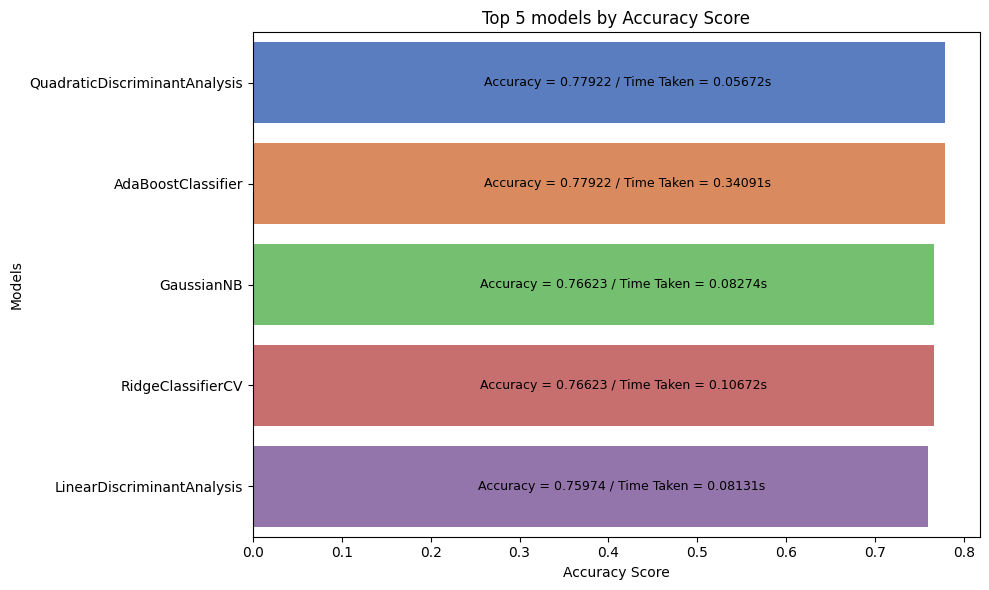

In [41]:
top5_accuracy = view_lazypredict_models.head(5)

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top5_accuracy,
    x="Accuracy",
    y="Model",
    palette="muted"
)

plt.title("Top 5 models by Accuracy Score")
plt.xlabel("Accuracy Score")
plt.ylabel("Models")


# Add Time Taken and Accuracy labels to each bar
for i, (acc, time) in enumerate(zip(top5_accuracy["Accuracy"], top5_accuracy["Time Taken"])):
    ax.text(
        acc/3,                                                      # position to write scores
        i,                                                          # y = position of the bar
        f"Accuracy = {acc:.5f} / Time Taken = {time:.5f}s",         # message to be written on the bars
        va="center",                                                # center vertically
        fontsize=9,
        color="black"
    )

plt.tight_layout()
plt.show()


<div align="center">

### - END -

</div>
